In [1]:
# My code
import fast_gillespie as fg
import fast_gillespie_viz as fgv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

mean_num_monomers =  100.0
interactions_param =  40.0


Progress:   0%|          | 0/30000 [00:00<?, ?it/s]

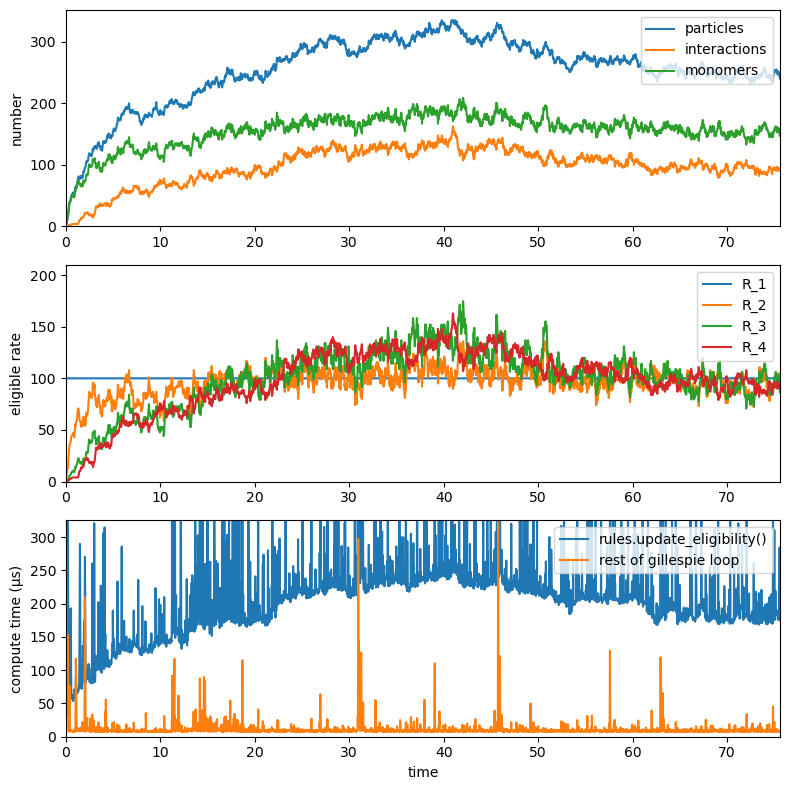

In [2]:
#Define linear homopolymer

# Rates in terms of interpretable quantities
mean_num_monomers = 100.0
interactions_param = 40.0  # I don't have a good interpretation for this
rate1 = mean_num_monomers
rate2 = 1.0
rate3 = interactions_param/(mean_num_monomers**2)
rate4 = 1.0

# # Rates from preprint
# rate1 = 200.0   # => mean_num_monomers = 200
# rate2 = 1.0
# rate3 = 0.03 # = interactions_param/(mean_num_monomers**2)
# rate4 = 1.0
# mean_num_monomers = rate1
# interactions_param = rate3 * mean_num_monomers**2

# Print out rate-determining quantities
print('mean_num_monomers = ', mean_num_monomers)
print('interactions_param = ', interactions_param)

#  Create Fock space
space = fg.FockSpace(fields=[])

# Create Rules
R_1 = fg.ParticleRule(name='R_1', rate=rate1, spec_str='A_hat_i a_tilde_i b_tilde_i', fock_space=space)
R_2 = R_1.get_conjugate_rule(name='R_2', rate=rate2)

R_3 = fg.AsymmetricInteractionRule(name='R_3', rate=rate3, spec_str='A_bar_i A_bar_j a_hat_i b_hat_j J_hat_ij', fock_space=space)
R_4 = R_3.get_conjugate_rule(name='R_4', rate=rate4)

rules = fg.RuleSet(rules=[R_1, R_2, R_3, R_4])

# Define summary stats to record
def summary_stats_func():
    stats_dict = dict(
        particles=len(space.field_dict['A'].indices),
        interactions=len(space.field_dict['J'].indices),
        monomers=len(space.field_dict['A'].indices)-len(space.field_dict['a'].indices)
    )
    return stats_dict

# Define, initialize, and run simulation
sim = fg.Simulation(space=space, rules=rules, custom_stats_func=summary_stats_func)
sim.initialize_state()
sim.run(num_steps=30_000, record_every=10)

fgv.show_sim_stats(sim, x_is_time=True)


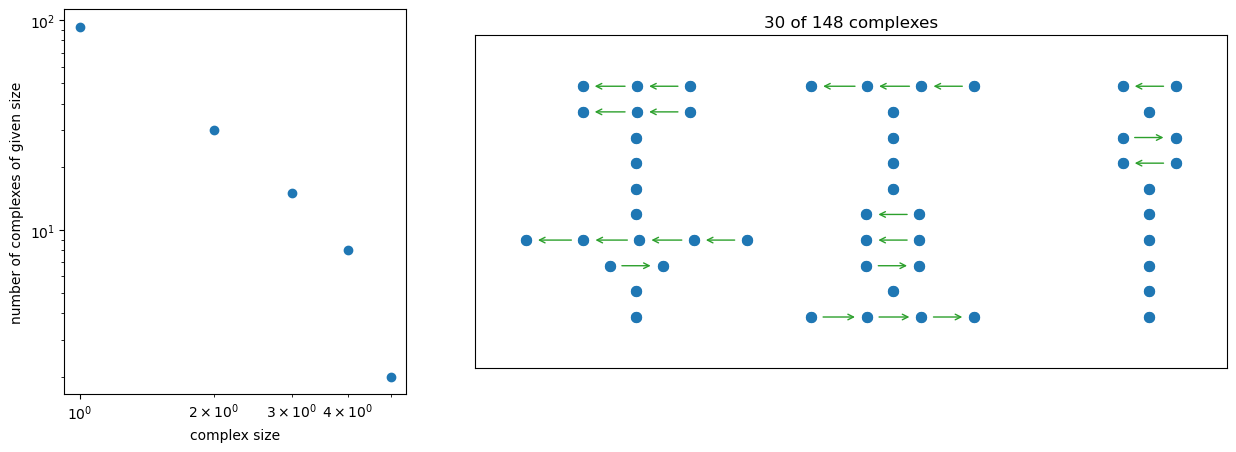

In [3]:
# Compute nodes and edges
nodes=[(f'A_{i[0]}',{'class':'A'}) for i in space.field_dict['A'].indices] 
edges=[(f'A_{i}', f'A_{j}', {'class':'J'}) for i,j in space.field_dict['J'].indices]

# Specify properties for visualize_complexes
node_properties={
    'A': {'node_color': 'C0', 'node_shape': 'o', 'node_size':50},
}
edge_properties= {
    'J': {'edge_color': 'C2', 'width': 1, 'arrowstyle': '->', 'arrowsize': 10}
}

# Make figure
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 3, figure=fig)

# Plot complex sizes
ax = fig.add_subplot(gs[0, 0])
fgv.show_complex_sizes(nodes, edges, ax=ax)

# Illustrate complexes
ax = fig.add_subplot(gs[0, 1:])
fgv.visualize_complexes(
    nodes=nodes,
    edges=edges,
    node_properties=node_properties,
    edge_properties=edge_properties,
    grid_shape=(10,3),
    x_spacing=5,
    y_spacing=0.5,
    ax=ax,
    iterations=1000,
    learning_rate=0.1)